In [10]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [4]:
# 加載 MNIST資料集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 正規化圖片數據
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
# 查看 shape
train_images.shape

(60000, 28, 28)

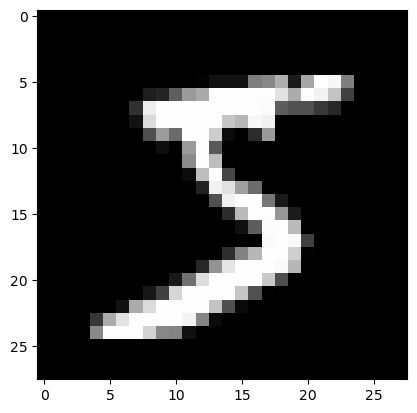

In [18]:
plt.imshow(train_images[0], cmap='gray')
train_labels[0]
plt.show()

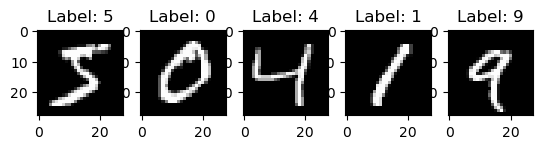

In [21]:
num_images_to_display = 5

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')

plt.show()

In [22]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),   
    Dense(64, activation='relu'),   
    Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 778us/step - loss: 0.0360 - accuracy: 0.9879
Epoch 2/5
1875/1875 [==============================] - 1s 784us/step - loss: 0.0298 - accuracy: 0.9905
Epoch 3/5
1875/1875 [==============================] - 1s 797us/step - loss: 0.0258 - accuracy: 0.9915
Epoch 4/5
1875/1875 [==============================] - 1s 776us/step - loss: 0.0211 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 1s 770us/step - loss: 0.0203 - accuracy: 0.9932


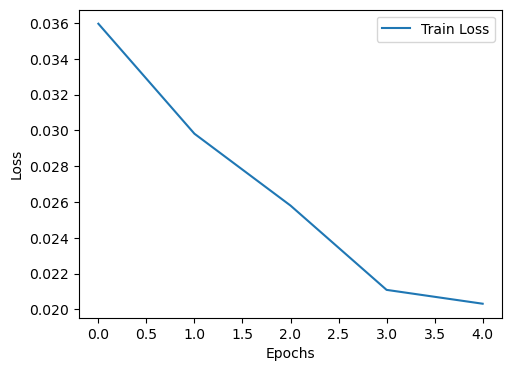

In [52]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 0s 445us/step - loss: 0.0860 - accuracy: 0.9754
Test accuracy: 0.9754


In [36]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 386us/step


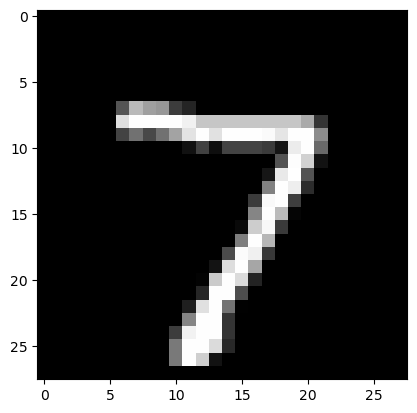

In [47]:
plt.imshow(test_images[0], cmap='gray')
plt.show()

In [44]:
predictions[0]

array([7.9342177e-10, 1.2771957e-08, 6.4696064e-07, 1.8284371e-05,
       9.3005443e-13, 2.8938546e-08, 1.9478139e-12, 9.9998093e-01,
       7.6121989e-09, 2.1675902e-07], dtype=float32)